In [1]:
%matplotlib inline

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
times = pd.read_csv("fahrzeitensollist2017010120170107.csv")

In [4]:
times.head()

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,fahrweg_id,fw_no,fw_typ,fw_kurz,fw_lang,umlauf_von,halt_id_von,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach
0,2,1,01.01.17,2075,6,1,6030,0,DEP4,01.01.17,...,41253,15,2,15,DEP4 - KALK,135780,2251,1906,12462,10563
1,2,1,01.01.17,3032,3,1,478,0,BEZI,01.01.17,...,42743,11,1,11,BEZI - BTIE für Ausfahrt,135319,1306,1502,12780,10622
2,2,1,01.01.17,3032,3,5,601,0,BOES,01.01.17,...,42743,11,1,11,BEZI - BTIE für Ausfahrt,135319,2228,2590,12823,12843
3,2,1,01.01.17,3032,3,4,1861,0,PARA,01.01.17,...,42743,11,1,11,BEZI - BTIE für Ausfahrt,135319,1528,2228,12584,12823
4,2,1,01.01.17,3032,3,3,2396,0,SIHS,01.01.17,...,42743,11,1,11,BEZI - BTIE für Ausfahrt,135319,2657,1528,10574,12584


In [5]:
times.loc[:, 'betriebsdatum'] = pd.to_datetime(times.betriebsdatum, format="%d.%m.%y")

Each row in our dataset corresponds to a trip from one stop to the next.

In [6]:
times.head(2).T

,0,1
linie,2,2
richtung,1,1
betriebsdatum,2017-01-01 00:00:00,2017-01-01 00:00:00
fahrzeug,2075,3032
kurs,6,3
seq_von,1,1
halt_diva_von,6030,478
halt_punkt_diva_von,0,0
halt_kurz_von1,DEP4,BEZI
datum_von,01.01.17,01.01.17


Trying to make sense of all the fields for each entry is going to take some doing. You can find some explanations at the bottom of https://data.stadt-zuerich.ch/dataset/vbz-fahrzeiten-ogd. Keep it handy as a reference. Let's explore what we have with some simple queries and plots.

## Looking at Stauffacher in detail

To get started let's look at what we can find out about the stop called "Stauffacher". Which lines stop at [Stauffacher](http://osm.org/go/0C0WAKRNl-?layers=N&m=)? What are the stops after Stauffacher? When do trams and busses arrive?

You can look at the official [timetable information page](https://online.fahrplaninfo.zvv.ch/frame_hst3.php?lang=de&hstNr=2556&hstName=) of ZVV to find out what lines stop here. From that page we learn two things:
* lines stopping here: 2, 3, 8, 9, 14, N14
* the ID number of the stop is 2556 (check the `hstNr` parameter in the link)

Another way to find the ID is to [look up your favourite stop in this list](https://data.stadt-zuerich.ch/dataset/vbz-fahrzeiten-ogd/resource/c1b38f60-2bad-4cf9-9171-7feacf65ad08).

In [7]:
stau = times.loc[times.halt_diva_von==2556, :].copy()
# explicitly copy the data to avoid warnings later about chained indexing

In [8]:
stau.head().T

,5,9,39,75,88
linie,2,2,2,2,2
richtung,1,1,1,1,1
betriebsdatum,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
fahrzeug,3032,3001,2075,3082,2072
kurs,3,5,6,9,2
seq_von,2,2,13,13,13
halt_diva_von,2556,2556,2556,2556,2556
halt_punkt_diva_von,0,0,0,0,0
halt_kurz_von1,STAU,STAU,STAU,STAU,STAU
datum_von,01.01.17,01.01.17,01.01.17,01.01.17,01.01.17


In [9]:
stau.linie.value_counts()

2     1847
3     1843
9     1800
8     1704
14    1625
17      56
4       44
13       4
Name: linie, dtype: int64

Each time a tram or bus stops at Stauffacher we get one entry in our data frame. The `value_counts` method counts how often each unique value appears, so using it on the `linie` column we see all of the lines that stop here and how often.

We find all the lines we would expect (2, 3, 8, 9 and 14), as well as three you would not expect to see: 4, 13 and 17. However there are only very few stop events for each of these three. Maybe this was a temporary re-routing? Something to investigate.

To find out which stops come after Stauffacher we can look at the `halt_diva_nach` column.

In [10]:
stau.halt_diva_nach.value_counts()

478     1848
2396    1822
1366    1777
6238    1772
2551     853
1158     851
Name: halt_diva_nach, dtype: int64

This slightly cryptic set of numbers tells us: there are 1848 trips from Stauffacher to the stop with the DIVA ID 478. This is great, but where or what is DIVA ID 478? To answer that we can consult the [list of all stops](https://data.stadt-zuerich.ch/dataset/vbz-fahrzeiten-ogd/resource/c1b38f60-2bad-4cf9-9171-7feacf65ad08?view_id=523f039a-2aa3-4b71-86f8-34f9a5714fae) and their proper names and latitude/longitude.

In [11]:
stops = pd.read_csv("https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/c1b38f60-2bad-4cf9-9171-7feacf65ad08/download/haltestelle.csv")
stops.set_index("halt_diva", inplace=True)

stops.head()

,halt_id,halt_kurz,halt_lang,halt_ist_aktiv
halt_diva,,,,
2570,143,BirmSte,"Birmensdorf ZH, Sternen/WSL",True
3356,309,WalBiSt,"Waldegg, Birmensdorferstrasse",True
6232,373,FRAF07,"Zürich Flughafen, Fracht",True
2655,539,TBAH01,"Thalwil, Bahnhof",True
3027,588,FLUG07,"Zürich Flughafen, Bahnhof",True


In [12]:
stops.loc[478]

halt_id                             1306
halt_kurz                           BEZI
halt_lang         Zürich, Bezirksgebäude
halt_ist_aktiv                      True
Name: 478, dtype: object

Why is it `stops.loc[478]`? Because we want to get the entry that has the label 478. Take a look at https://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-label for more details on indexing in pandas.

We can now construct a human readable list of stops that come after Stauffacher:

In [13]:
print("From Stauffacher you can go to:")
for diva_id in set(stau.halt_diva_nach.values):
    print(" ", stops.loc[diva_id].halt_lang)

From Stauffacher you can go to:
  Zürich, Bezirksgebäude
  Zürich, Helvetiaplatz
  Zürich, Sihlpost / HB
  Zürich, Bahnhof Selnau
  Zürich, Sihlstrasse
  Zürich, Werd


After all this text based exploring, time to make some plots.

In [14]:
stau.loc[:, 'arrival_delay'] = stau.ist_an_von - stau.soll_an_von
stau.loc[:, 'departure_delay'] = stau.ist_ab_von - stau.soll_ab_von

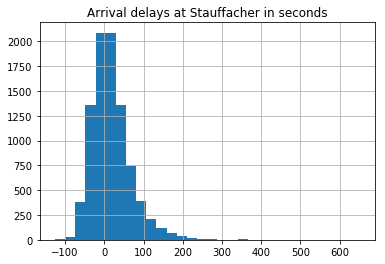

In [15]:
stau.arrival_delay.hist(bins=30)
plt.title("Arrival delays at Stauffacher in seconds");

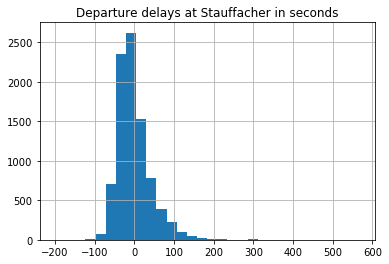

In [16]:
stau.departure_delay.hist(bins=30)
plt.title("Departure delays at Stauffacher in seconds");

In [17]:
stau.loc[:, 'datum_von'] = pd.to_datetime(stau.datum_von, format="%d.%m.%y")
stau.loc[:, 'datum_nach'] = pd.to_datetime(stau.datum_nach, format="%d.%m.%y")

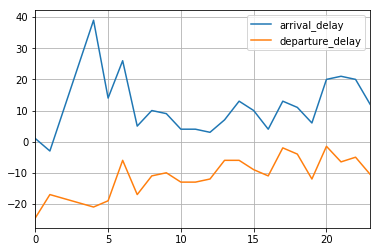

In [32]:
from datetime import timedelta, datetime

(stau.set_index(['datum_von', 'soll_an_von'])[['arrival_delay', 'departure_delay']]
     .groupby(by=lambda idx: (idx[0] + timedelta(seconds=idx[1])).hour)
     .median()
     .plot())
plt.grid();

Something is weird here, trams/busses tend to arrive late but leave early???

---

scratch pad below here, remove me

In [19]:
import numpy as np

linie14 = times[np.logical_and(times.linie==14, times.betriebsdatum=='2017-01-01')]

In [20]:
groups = linie14.groupby(by='fw_kurz', group_keys=True)

In [21]:
for fw_id, grouped in groups:
    print(fw_id, set(grouped.fw_lang))

1 {'SEEB - TRIE'}
2 {'TRIE - SEEB'}
3 {'BWIE - TRIE für Ausfahrt'}
4 {'SOER - SEEB für Ausfahrt'}
7 {'SEEB - SOER für Einfahrt'}
8 {'TRIE - BWIE für Einfahrt'}
9 {'SEEB - BWIE für Einfahrt'}
10 {'TRIE - SOER für Einfahrt'}
11 {'DEP8 - SOER  Richtung SEEB'}
12 {'DEP4 - BWIE Richtung TRIE'}
15 {'BWIE - DEP4 von TRIE'}
16 {'SOER - DEP8 von SEEB'}
17 {'SOER - DEP8 via BOER'}


In [36]:
soll_an_von_dt = stau.apply(lambda row: row.datum_von + \
                                        timedelta(seconds=row.soll_an_von),
                            axis=1)

In [41]:
soll_an_von_dt.head()

5    2017-01-01 04:57:48
9    2017-01-01 05:07:54
39   2017-01-01 05:20:48
75   2017-01-01 05:35:48
88   2017-01-01 05:50:48
dtype: datetime64[ns]

In [39]:
stau.head()

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,fw_typ,fw_kurz,fw_lang,umlauf_von,halt_id_von,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach,arrival_delay,departure_delay
5,2,1,2017-01-01,3032,3,2,2556,0,STAU,2017-01-01,...,1,11,BEZI - BTIE für Ausfahrt,135319,1502,2657,10622,10574,39,-22
9,2,1,2017-01-01,3001,5,2,2556,0,STAU,2017-01-01,...,1,11,BEZI - BTIE für Ausfahrt,135232,1502,2657,10622,10574,65,-1
39,2,1,2017-01-01,2075,6,13,2556,0,STAU,2017-01-01,...,1,1,FARB - BTIE,135780,1502,2657,10622,10574,-40,-30
75,2,1,2017-01-01,3082,9,13,2556,0,STAU,2017-01-01,...,1,1,FARB - BTIE,136585,1502,2657,10622,10574,38,13
88,2,1,2017-01-01,2072,2,13,2556,0,STAU,2017-01-01,...,1,1,FARB - BTIE,136260,1502,2657,10622,10574,26,-7
